<a href="https://colab.research.google.com/github/ParthDave111/financial-engineering-/blob/main/Sensitivity_to_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sensitivity to Outlier

Defination: Presence of one or more extreme values in a dataset influence overall analysis (startistical analysis , regression analysis)

For a dataset X = {x1,x2,x3....xN} the sensitvity of measure S to outlier(X0) is  
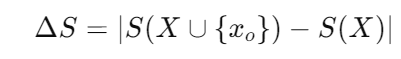


Description

Outlier can influence the final result and lead to skewed interpretetiion of data hence leading to misleading conclusion.

Demonstration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Assume base price of stock is 100$

In [3]:
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31')
price_changes = np.random.normal(0, 1, len(dates))  # Simulated daily price changes
prices = 100 + np.cumsum(price_changes)  # Simulated stock prices starting at 100

In [4]:
price_changes.shape

(365,)

In [5]:
import statistics

mean = np.mean(prices)
median = np.median(prices)
mode = statistics.mode(prices)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 95.55892626571452
Median: 95.35750145515777
Mode: 100.49671415301123


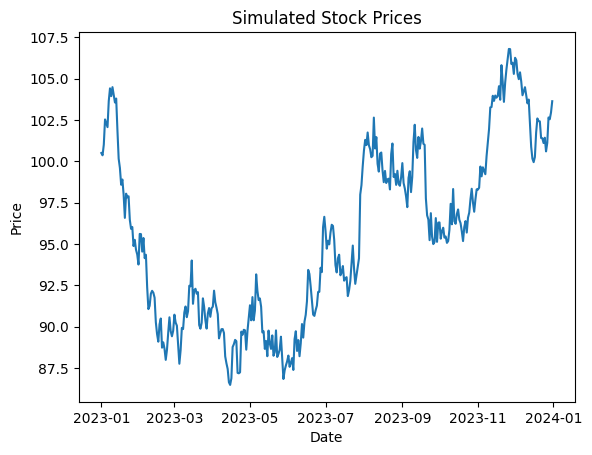

In [6]:
import matplotlib.pyplot as plt
plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simulated Stock Prices')
plt.show()


Introducing Outlier

In [7]:

data_with_outlier = prices

In [8]:
# adding 3 outlier, outlier 1-3 within the data set
data_with_outlier[10] = 200
data_with_outlier[20] = 50
data_with_outlier[30] = 150

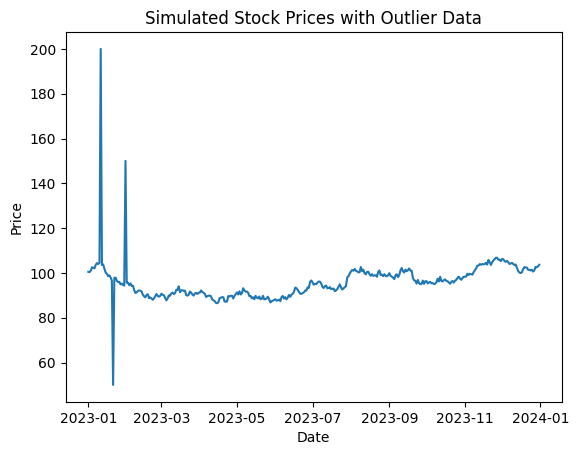

In [9]:
import matplotlib.pyplot as plt
plt.plot(dates, data_with_outlier)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simulated Stock Prices with Outlier Data')
plt.show()

# Damage

Outlier impacts statastical analysis and make conclusion ambigious.

In [10]:

import numpy as np
mean_outlier = np.mean(data_with_outlier)
median_outlier = np.median(data_with_outlier)
mode_outlier = statistics.mode(data_with_outlier)

print("Mean with outlier:", mean_outlier)
print("Median with outlier:", median_outlier)
print("Mode with outlier:", mode_outlier)

Mean with outlier: 95.84437624523098
Median with outlier: 95.35750145515777
Mode with outlier: 100.49671415301123


In [11]:
Dif_1 = mean_outlier - mean
Dif_2 = median_outlier - median
Dif_3 = mode_outlier - mode

In [12]:
Dif_1

0.2854499795164571

In [13]:
Dif_2

0.0

In [14]:
Dif_3

0.0

In [16]:
#Observation :- Outlier impact the mean most and if there are many outlier than median changes slightly and there is no impact on mode

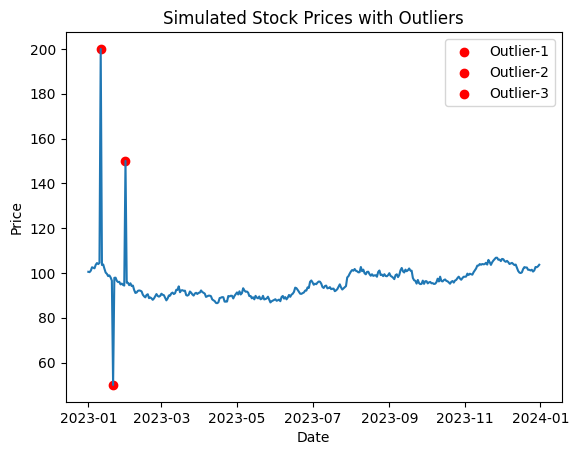

In [19]:
data_with_outlier[10] = 200
data_with_outlier[20] = 50
data_with_outlier[30] = 150

# Creating graph and labelling outliers
fig, ax = plt.subplots()
ax.plot(dates, data_with_outlier)
ax.scatter(dates[10], data_with_outlier[10], color='red', label='Outlier-1')
ax.scatter(dates[20], data_with_outlier[20], color='red', label='Outlier-2')
ax.scatter(dates[30], data_with_outlier[30], color='red', label='Outlier-3')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Simulated Stock Prices with Outliers')
ax.legend()
plt.show()

Direction

1. Z score Test

In [20]:
def calculate_z_scores(data):
    mean = np.mean(data)
    std = np.std(data) # Indentation corrected to 8 spaces
    return (data - mean) / std

In [21]:
z_scores = calculate_z_scores(data_with_outlier)

In [22]:
def calculate_z_scores_pandas(data):

  return pd.Series(data).transform(lambda x: (x - x.mean()) / x.std())

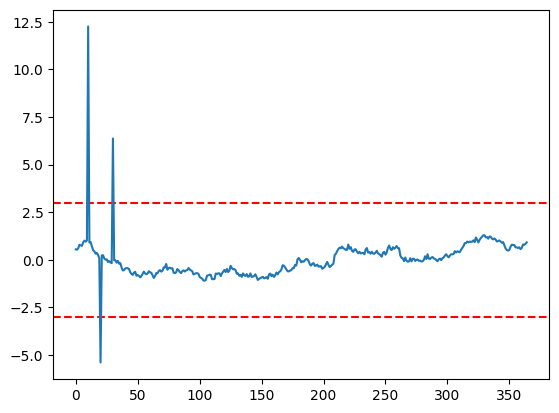

In [23]:
import matplotlib.pyplot as plt
plt.axhline(3, color='red', linestyle='--', label='+3 Standard Deviations')
plt.axhline(-3, color='red', linestyle='--', label='-3 Standard Deviations')

plt.plot(z_scores)
plt.show()

Any point outside +3 and -3 standard deviation is considered an outlier and will have significant impact on statistical analysis

Box Plot Analysis of Z Score

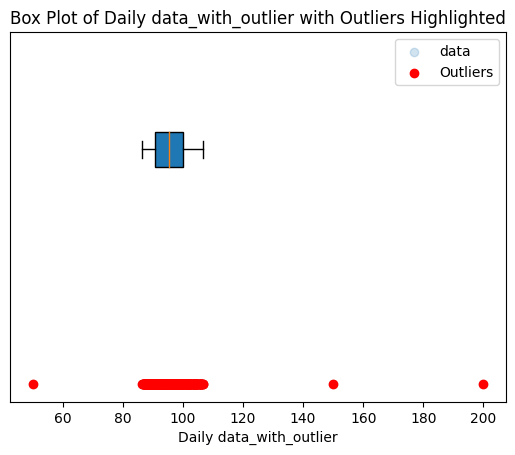

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_with_outlier' is a NumPy array, convert it to a Pandas Series
data_series = pd.Series(data_with_outlier)

# Box plot
plt.boxplot(data_series.dropna(), vert=False, patch_artist=True, showfliers=False)

# Plot all data_with_outlier
plt.scatter(data_series, np.zeros_like(data_series), alpha=0.2, label='data')

# Assuming 'outliers' is a list, convert it to a Pandas Series for consistency
outliers_series = pd.Series(data_with_outlier)

# Highlight outliers
plt.scatter(outliers_series, np.zeros_like(outliers_series), color='red', label='Outliers')

# Customizing the plot
plt.title('Box Plot of Daily data_with_outlier with Outliers Highlighted')
plt.xlabel('Daily data_with_outlier')
plt.yticks([])  # Remove y-axis ticks
plt.legend()
plt.show()

Once outliers are diagnosed , we can apply cooks distance to rectify the model

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
import pandas as pd
import statsmodels.formula.api as smf

# Convert the DatetimeIndex to a NumPy array of numeric timestamps
dates_numeric = dates.astype('int64') // 10**9  # Convert to Unix timestamps

# Create the DataFrame with the numeric dates
data = pd.DataFrame({'X': data_with_outlier, 'Y': dates_numeric})

# Now try fitting the model again
model = smf.ols('Y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     40.61
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           5.65e-10
Time:                        13:00:12   Log-Likelihood:                -6347.4
No. Observations:                 365   AIC:                         1.270e+04
Df Residuals:                     363   BIC:                         1.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.656e+09   5.13e+06    322.680      0.0

In [29]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

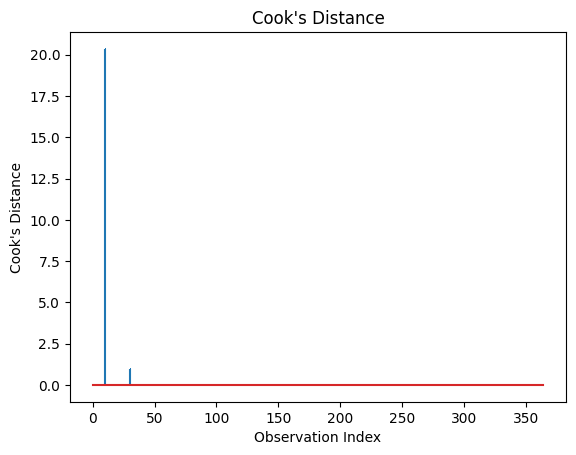

In [30]:
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

In [41]:
cooks_d

array([7.16557870e-03, 6.95959752e-03, 7.55043164e-03, 9.39185848e-03,
       8.97230443e-03, 8.57227823e-03, 1.08406235e-02, 1.21085093e-02,
       1.11408000e-02, 1.20146113e-02, 2.03532505e+01, 1.01794051e-02,
       1.04704023e-02, 7.68891817e-03, 5.90920353e-03, 5.41911265e-03,
       4.73336034e-03, 4.85495386e-03, 4.33937539e-03, 3.80248623e-03,
       1.63546087e-03, 4.11762385e-03, 4.09645960e-03, 3.59284218e-03,
       3.43664594e-03, 3.41350782e-03, 3.21883673e-03, 3.21283677e-03,
       3.11873867e-03, 3.06208515e-03, 9.63664573e-01, 3.09183460e-03,
       3.04887274e-03, 2.90665436e-03, 2.93743604e-03, 2.80950383e-03,
       2.77723308e-03, 2.76352053e-03, 2.83658907e-03, 2.77113082e-03,
       2.66410202e-03, 2.61087006e-03, 2.57706422e-03, 2.55655824e-03,
       2.65025659e-03, 2.68494504e-03, 2.69052971e-03, 2.52733347e-03,
       2.45015549e-03, 2.58399031e-03, 2.50135420e-03, 2.49265616e-03,
       2.51075573e-03, 2.40268999e-03, 2.26471475e-03, 2.15073445e-03,
      

In [42]:
threshold = 4/ len(data)

In [47]:
influential_points = np.where(cooks_d > threshold)[0]

In [48]:
print(f"Influential points: {influential_points}")

Influential points: [ 7  8  9 10 30]


In [49]:
data_cleaned = data.drop(index=influential_points)

In [50]:
model_cleaned = smf.ols('Y ~ X', data=data_cleaned).fit()

In [51]:
print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     217.8
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           7.83e-39
Time:                        13:04:49   Log-Likelihood:                -6189.9
No. Observations:                 360   AIC:                         1.238e+04
Df Residuals:                     358   BIC:                         1.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.598e+09   6.14e+06    260.391      0.0

## Regression Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [2]:
# for reproduciblity
np.random.seed(42)


In [4]:
time = 2 * np.random.rand(100, 1)
returns = 5 + 3 * time + np.random.randn(100, 1)

Creating regression analysis with Y = mx +c equation

In [6]:
time_outliers = np.append(time, [[1.5], [1.8], [2]], axis=0)
returns_outliers = np.append(returns, [[20], [22], [24]], axis=0)

In [7]:
# Convert to DataFrame for convenience
data = pd.DataFrame(np.hstack([time_outliers, returns_outliers]), columns=['time', 'return'])

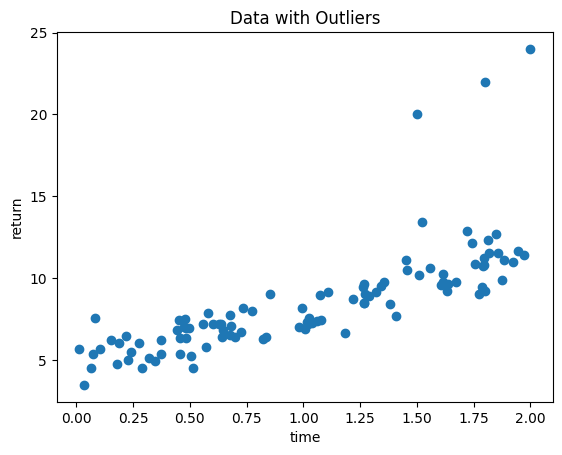

In [8]:
# Plot the data with outliers
plt.scatter(data['time'], data['return'])
plt.title("Data with Outliers")
plt.xlabel("time")
plt.ylabel("return")
plt.show()

Linear regression

Linear regression finds a straight line that best fits the relationship between a dependent variable (what you're trying to predict) and one or more independent variables (what you think influences it).

In [9]:
# Add a constant term for the intercept
time_const = sm.add_constant(data['time'])



The OLS method in linear regression fits a straight line by minimizing the squared differences between the actual values and the values predicted by the line. This creates the "best-fit" line based on the principle of least squares.

In [10]:
# Fit the OLS model
model = sm.OLS(data['return'], time_const).fit()

In [11]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           3.10e-20
Time:                        20:31:38   Log-Likelihood:                -222.32
No. Observations:                 103   AIC:                             448.6
Df Residuals:                     101   BIC:                             453.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3365      0.416     10.433      0.0

R-squared: The model explains 57% (0.570) of the variance in the dependent variable ("return"). This indicates a moderate fit.

Cooks Distance

Cook's distance measures how much a single data point influences the slope and intercept of a fitted linear regression line. High Cook's distance indicates a data point that could be an outlier and significantly affect the model if removed.

In [12]:
# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]


In [13]:
# Print Cook's distance
print("Cook's Distance for each observation:")
print(cooks_d)

Cook's Distance for each observation:
[3.04727972e-05 3.17275693e-04 1.18129063e-04 1.48542526e-03
 9.85815635e-04 7.03577216e-04 2.49162205e-03 2.02503120e-04
 1.40371468e-03 5.96994722e-03 2.46070806e-03 7.02140725e-04
 5.55093894e-04 1.07173883e-03 1.45372879e-05 1.25049626e-03
 4.00118846e-03 6.13051810e-04 1.44877295e-02 1.96969379e-03
 3.13928504e-03 2.79569603e-03 9.67833540e-05 5.07421473e-03
 6.94749854e-05 1.67929352e-03 4.53372751e-03 6.26167521e-03
 7.40588823e-03 1.88778557e-03 2.10676334e-03 9.60721116e-04
 1.00311105e-04 6.13500845e-04 3.07332336e-03 2.00675520e-05
 1.91058920e-03 9.07056790e-03 4.57105882e-04 1.43360312e-03
 5.79104476e-03 2.52664863e-03 6.74427237e-05 2.58649910e-04
 1.24777500e-03 2.24910728e-03 4.54925894e-04 2.74372530e-03
 3.26363539e-03 6.86180243e-04 1.75289461e-04 2.94592759e-03
 3.04956884e-03 1.99700255e-03 3.94629496e-03 8.63236836e-04
 1.18735144e-04 1.58632783e-02 1.06595216e-03 7.82490144e-05
 9.09576821e-04 5.14060819e-06 1.39256452e-03 7

In [14]:
threshold = 4 / len(data)

In [15]:
influential_points = np.where(cooks_d > threshold)[0]

In [16]:
print("Influential points (indices):", influential_points)

Influential points (indices): [100 101 102]


<ipython-input-17-f7d7e44c8034>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(data)), cooks_d, markerfmt=",", use_line_collection=True)


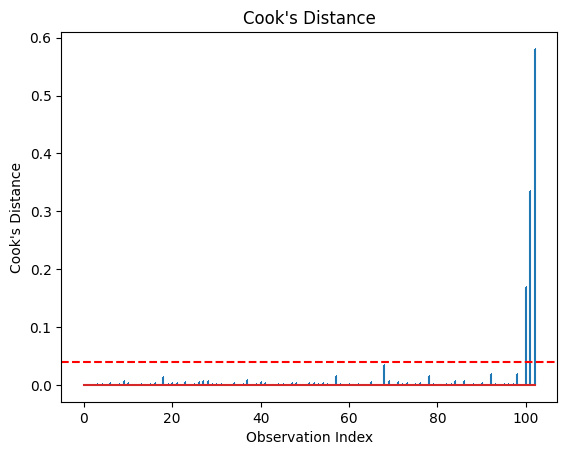

In [17]:
# Plot Cook's distance
plt.stem(np.arange(len(data)), cooks_d, markerfmt=",", use_line_collection=True)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

Data points with high Cook's distance are potential outliers that could significantly affect the model's fit if removed.

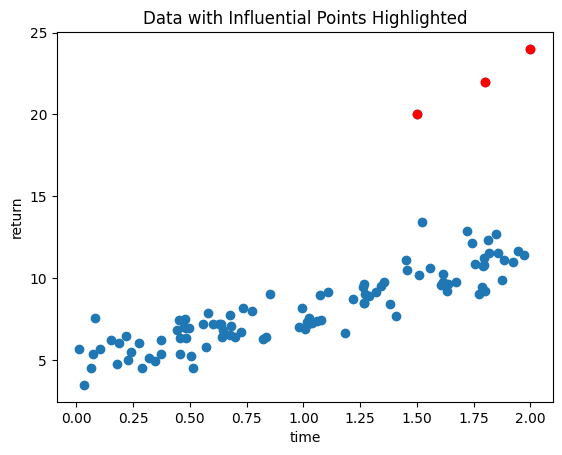

In [18]:
# Highlight influential points in the original data plot
plt.scatter(data['time'], data['return'])
plt.scatter(data['time'].iloc[influential_points], data['return'].iloc[influential_points], color='red')
plt.title("Data with Influential Points Highlighted")
plt.xlabel("time")
plt.ylabel("return")
plt.show()

In [19]:
## spliting data set for doing ML and finding accuracy

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data[['time']], data['return'], test_size=0.2, random_state=42)

In [22]:
## ORDINARY LEAST SQUARE REGRESSION

In [23]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)


Lasso

Lasso regression shrinks coefficients of features towards zero, potentially setting some to zero entirely. This pushes the influence of outliers down, making the model less sensitive to extreme values in your data. By reducing the impact of outliers, Lasso can lead to a more robust model that generalizes better to unseen data.

In [24]:
## LASSO REGRESSION

In [25]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

Hubber Regression

Huber regression tackles outliers by downplaying their influence. It uses a different error function than regular regression. For small errors (like those from most data points), Huber acts like regular regression. But for large errors (often from outliers), Huber reduces their impact, making the model more resistant to extreme values in your data. This helps achieve a balance between fitting the data and being robust to outliers.

In [26]:
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

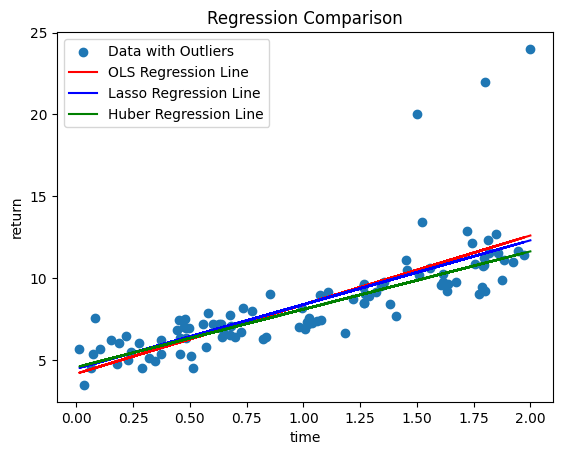

In [27]:
plt.scatter(data['time'], data['return'], label='Data with Outliers')
plt.plot(data['time'], ols_model.predict(data[['time']]), color='red', label='OLS Regression Line')
plt.plot(data['time'], lasso_model.predict(data[['time']]), color='blue', label='Lasso Regression Line')
plt.plot(data['time'], huber_model.predict(data[['time']]), color='green', label='Huber Regression Line')
plt.title("Regression Comparison")
plt.xlabel("time")
plt.ylabel("return")
plt.legend()
plt.show()

In [28]:
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R²: {r2}")

In [29]:
print_metrics("OLS Regression", y_test, y_pred_ols)
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Huber Regression", y_test, y_pred_huber)

OLS Regression - Mean Squared Error: 5.415708502186122, R²: 0.48993101967929276
Lasso Regression - Mean Squared Error: 5.320946472712487, R²: 0.4988560147611416
Huber Regression - Mean Squared Error: 5.496415963246517, R²: 0.48232972940476426


In [30]:
print(f"OLS Intercept: {ols_model.intercept_}, Coefficient: {ols_model.coef_[0]}")
print(f"Lasso Intercept: {lasso_model.intercept_}, Coefficient: {lasso_model.coef_[0]}")
print(f"Huber Intercept: {huber_model.intercept_}, Coefficient: {huber_model.coef_[0]}")

OLS Intercept: 4.173093101262957, Coefficient: 4.217749967773163
Lasso Intercept: 4.47536600624443, Coefficient: 3.919399671000545
Huber Intercept: 4.56896786177283, Coefficient: 3.5348474811401416


In this simulated data set, its recommended to go for OLS but R squared value is low. When Mean squuared error is not closer to zero and R square is negative then traditional regression method should not be used

## Simulating a scenario whrn R squared is negative

In [32]:
## adding some more outliers to demonstrate negative r squared

In [45]:
# outliers
outlier_time = 2 * np.random.rand(10, 1)
outlier_return = 20 + 10 * np.random.randn(10, 1)

In [46]:
time_outliers = np.vstack([time, outlier_time])
return_outliers = np.vstack([returns, outlier_return])

In [47]:
data = pd.DataFrame(np.hstack([time_outliers, return_outliers]), columns=['time', 'return'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data[['time']], data['return'], test_size=0.2, random_state=42)

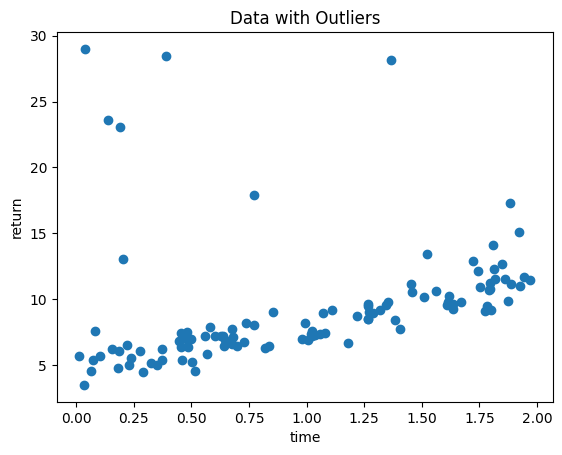

In [49]:
plt.scatter(data['time'], data['return'])
plt.title("Data with Outliers")
plt.xlabel("time")
plt.ylabel("return")
plt.show()

In [50]:
# Ordinary Least Squares (OLS) Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

In [51]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [52]:
# Huber Regression (Robust to outliers)
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

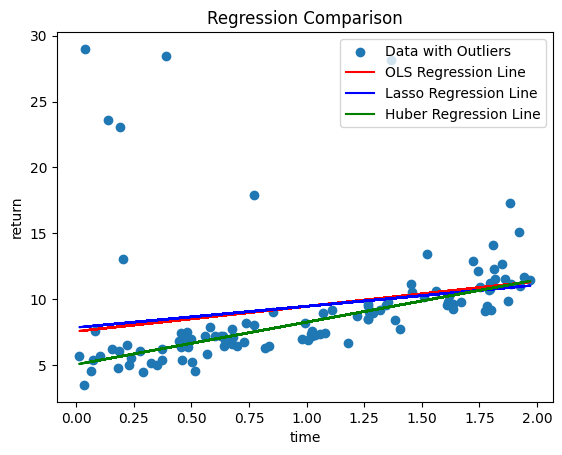

In [53]:
# Plot the results
plt.scatter(data['time'], data['return'], label='Data with Outliers')
plt.plot(data['time'], ols_model.predict(data[['time']]), color='red', label='OLS Regression Line')
plt.plot(data['time'], lasso_model.predict(data[['time']]), color='blue', label='Lasso Regression Line')
plt.plot(data['time'], huber_model.predict(data[['time']]), color='green', label='Huber Regression Line')
plt.title("Regression Comparison")
plt.xlabel("time")
plt.ylabel("return")
plt.legend()
plt.show()

In [54]:
# Calculate and print accuracy metrics
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R²: {r2:.2f}")


In [55]:
print_metrics("OLS Regression", y_test, y_pred_ols)
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Huber Regression", y_test, y_pred_huber)

OLS Regression - Mean Squared Error: 14.60, R²: 0.06
Lasso Regression - Mean Squared Error: 14.74, R²: 0.05
Huber Regression - Mean Squared Error: 14.92, R²: 0.04


Here R squared is close to Zero and this model fit is not an ideal model. If the data set was very huge then it was recommended to use Decesion tree.

Demonstration for Decesion tree [ This works for more feature data set and data set should be large]

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['time']], data['return'], test_size=0.2, random_state=42)

In [58]:
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
tree_predictions = tree_regressor.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)

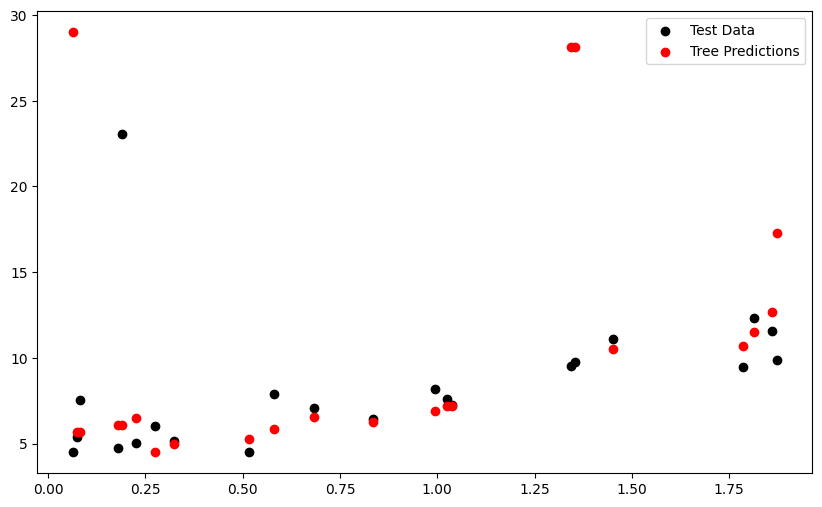

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_test, tree_predictions, color='red', label='Tree Predictions')
plt.legend()
plt.show()

In [61]:
tree_predictions = tree_regressor.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)

In [62]:
print(f'Decision Tree Regression MSE: {tree_mse:.3f}')

Decision Tree Regression MSE: 74.883
